# Taylor Woodington
# DSC640 Milestone Graphics and Data Exploration

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel(r'C:\Users\Shaun\Downloads\nationaldatabaseofchildcareprices.xlsx')

# Ensure the data has been loaded 
print(df.head(10))

  State_Name State_Abbreviation     County_Name  County_FIPS_Code  StudyYear  \
0    Alabama                 AL  Autauga County              1001       2008   
1    Alabama                 AL  Autauga County              1001       2009   
2    Alabama                 AL  Autauga County              1001       2010   
3    Alabama                 AL  Autauga County              1001       2011   
4    Alabama                 AL  Autauga County              1001       2012   
5    Alabama                 AL  Autauga County              1001       2013   
6    Alabama                 AL  Autauga County              1001       2014   
7    Alabama                 AL  Autauga County              1001       2015   
8    Alabama                 AL  Autauga County              1001       2016   
9    Alabama                 AL  Autauga County              1001       2017   

   UNR_16  FUNR_16  MUNR_16  UNR_20to64  FUNR_20to64  ...  MFCCToddler  \
0    5.42     4.41     6.32         4.6      

In [3]:
# Narrow down to columns of interest
columns_of_interest = [
    'State_Name', 'State_Abbreviation', 'FLFPR_20to64', 'FLFPR_20to64_Under6', 'ME', 'FME', 'MME',
    'MCToddler', 'MCPreschool', 'H_Under6_BothWork', 'H_Under6_FWork', 'H_Under6_MWork',
    'H_Under6_SingleM', 'MEMP_M', 'FEMP_M', 'MEMP_Service', 'FEMP_Service', 'MEMP_Sales', 
    'FEMP_Sales', 'MEMP_N', 'FEMP_N', 'MEMP_P', 'FEMP_P'
]

# Subset Dataframe to focus on the columns of interest
df_subset = df[columns_of_interest]

# Check for missing values and print
missing_values = df_subset.isnull().sum()
print("Missing values summary:\n", missing_values)

# Check for duplicates and print
duplicates = df_subset.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Drop rows with missing values or duplicates
df_cleaned = df_subset.dropna().drop_duplicates()

# Print cleaned DataFrame
print(df_cleaned.head(10))

Missing values summary:
 State_Name                 0
State_Abbreviation         0
FLFPR_20to64               0
FLFPR_20to64_Under6        0
ME                         0
FME                        0
MME                        0
MCToddler              10974
MCPreschool            10974
H_Under6_BothWork          0
H_Under6_FWork             0
H_Under6_MWork             0
H_Under6_SingleM           2
MEMP_M                     0
FEMP_M                     0
MEMP_Service               0
FEMP_Service               0
MEMP_Sales                 0
FEMP_Sales                 0
MEMP_N                     0
FEMP_N                     0
MEMP_P                     0
FEMP_P                     0
dtype: int64

Number of duplicate rows: 0
  State_Name State_Abbreviation  FLFPR_20to64  FLFPR_20to64_Under6       ME  \
0    Alabama                 AL          68.9                 66.9  28444.0   
1    Alabama                 AL          70.8                 63.7  29648.0   
2    Alabama                 

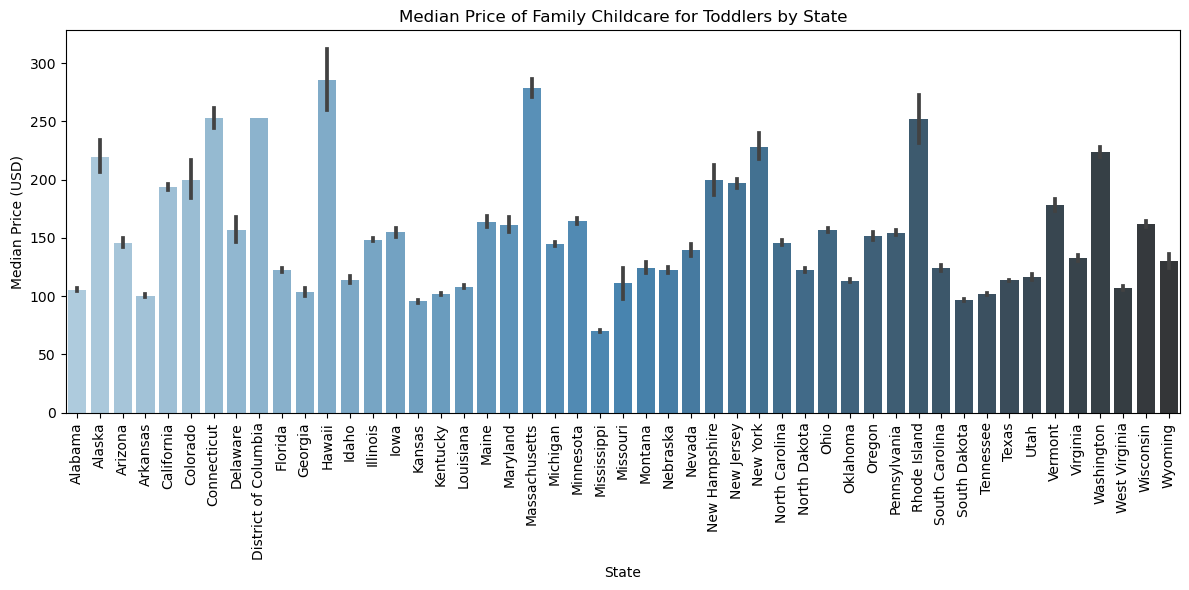

In [4]:
# Bar chart for the median price of family childcare for toddlers by state
plt.figure(figsize=(12, 6))
sns.barplot(x='State_Name', y='MCToddler', data=df_cleaned, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Median Price of Family Childcare for Toddlers by State')
plt.xlabel('State')
plt.ylabel('Median Price (USD)')
plt.tight_layout()
plt.show()

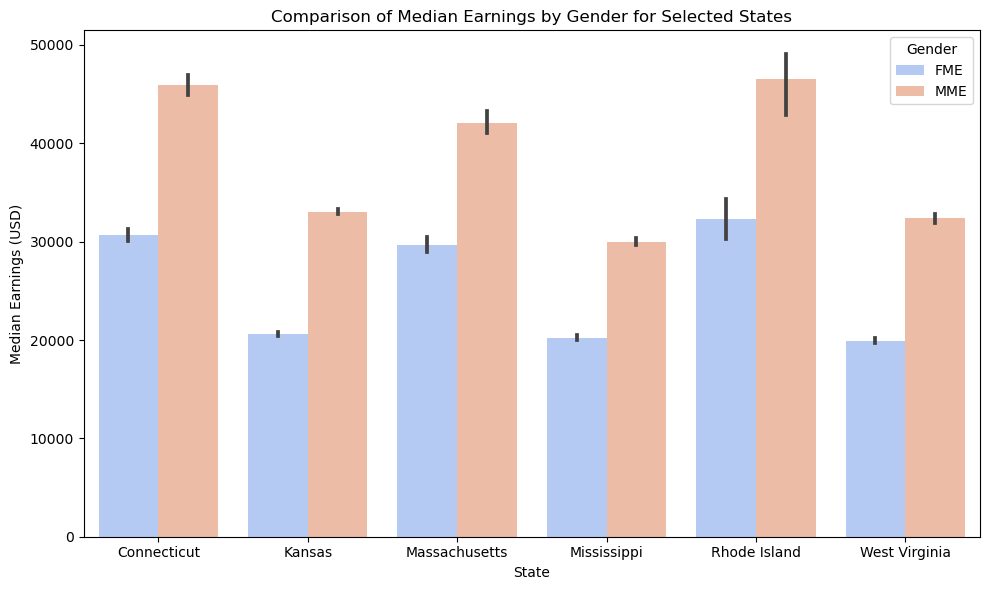

In [22]:
# Filter for selected states
selected_states = ['Massachusetts', 'Rhode Island', 'Connecticut', 'Mississippi', 'Kansas', 'West Virginia']
df_selected_states = df_cleaned[df_cleaned['State_Name'].isin(selected_states)]

# Bar chart comparing FME and MME for the selected states
df_selected_melted = df_selected_states.melt(id_vars='State_Name', value_vars=['FME', 'MME'], var_name='Gender', value_name='Earnings')

plt.figure(figsize=(10, 6))
sns.barplot(x='State_Name', y='Earnings', hue='Gender', data=df_selected_melted, palette='coolwarm')
plt.title('Comparison of Median Earnings by Gender for Selected States')
plt.xlabel('State')
plt.ylabel('Median Earnings (USD)')
plt.tight_layout()
plt.show()

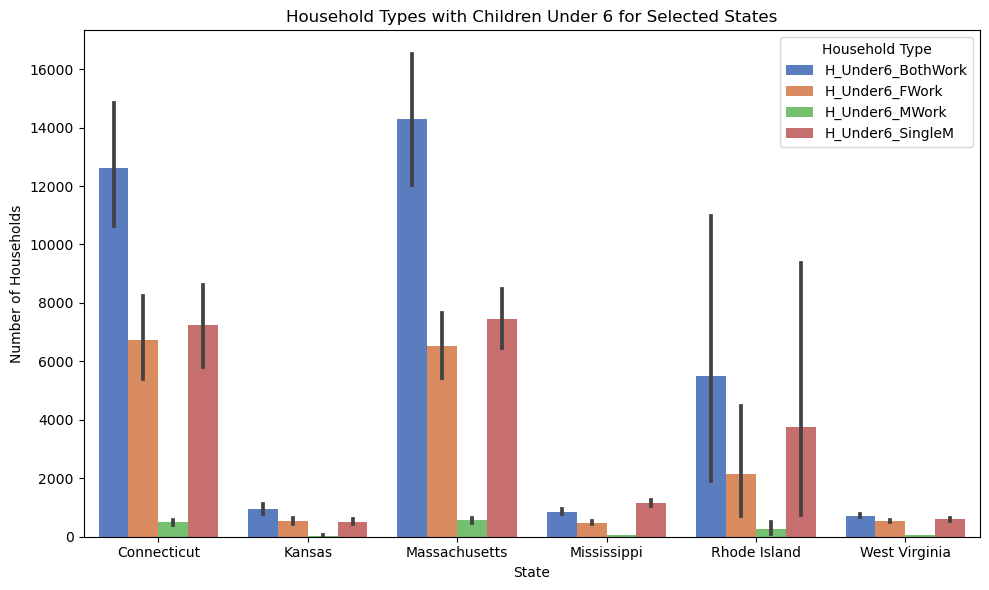

In [6]:
# Melt the household columns for the selected states
household_columns = ['H_Under6_BothWork', 'H_Under6_FWork', 'H_Under6_MWork', 'H_Under6_SingleM']
df_households_melted = df_selected_states.melt(id_vars='State_Name', value_vars=household_columns, var_name='Household Type', value_name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='State_Name', y='Count', hue='Household Type', data=df_households_melted, palette='muted')
plt.title('Household Types with Children Under 6 for Selected States')
plt.xlabel('State')
plt.ylabel('Number of Households')
plt.tight_layout()
plt.show()

C:\Users\Shaun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shaun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shaun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shaun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

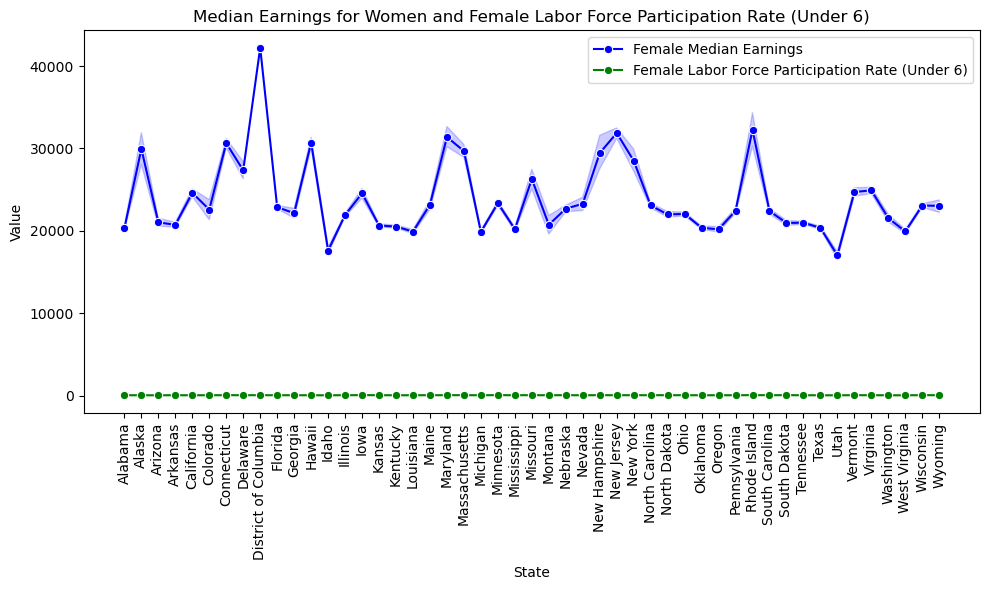

In [7]:
# Line chart for FME and FLFPR_20to64_Under6
plt.figure(figsize=(10, 6))
sns.lineplot(x='State_Name', y='FME', data=df_cleaned, label='Female Median Earnings', marker='o', color='blue')
sns.lineplot(x='State_Name', y='FLFPR_20to64_Under6', data=df_cleaned, label='Female Labor Force Participation Rate (Under 6)', marker='o', color='green')
plt.xticks(rotation=90)
plt.title('Median Earnings for Women and Female Labor Force Participation Rate (Under 6)')
plt.xlabel('State')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Shaun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shaun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


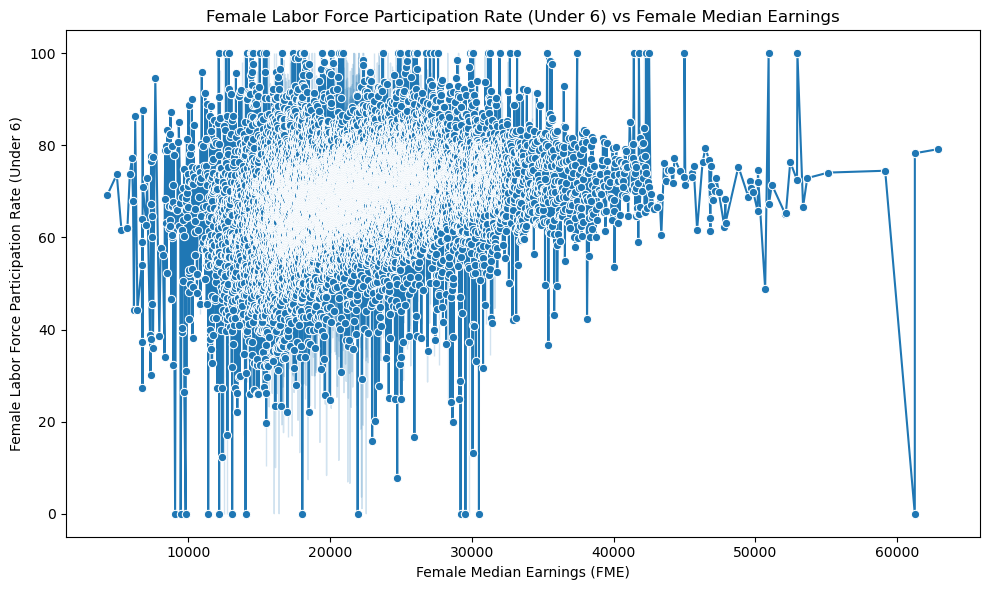

In [10]:
# Line plot with Female Median Earnings (FME) on the x-axis and Female Labor Force Participation Rate (Under 6) on the y-axis
plt.figure(figsize=(10, 6))

# Plot FME on the x-axis and FLFPR_20to64_Under6 on the y-axis
sns.lineplot(x='FME', y='FLFPR_20to64_Under6', data=df_cleaned, marker='o')

# Add title and labels
plt.title('Female Labor Force Participation Rate (Under 6) vs Female Median Earnings')
plt.xlabel('Female Median Earnings (FME)')
plt.ylabel('Female Labor Force Participation Rate (Under 6)')

# Display the plot
plt.tight_layout()
plt.show()

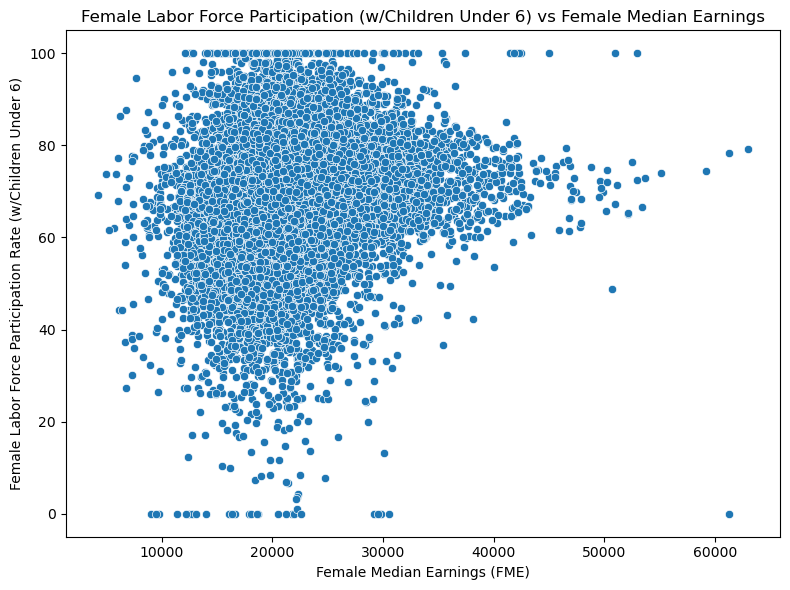

In [38]:
# Scatterplot of Female Labor Force Participation vs Female Median Earnings
plt.figure(figsize=(8, 6))
sns.scatterplot(x='FME', y='FLFPR_20to64_Under6', data=df_cleaned)
plt.title('Female Labor Force Participation (w/Children Under 6) vs Female Median Earnings')
plt.xlabel('Female Median Earnings (FME)')
plt.ylabel('Female Labor Force Participation Rate (w/Children Under 6)')
plt.tight_layout()
plt.show()# Reshape the data using melt to get the categories on the x-axis
df_earnings_melted = df_cleaned[['State_Name', 'ME', 'FME', 'MME']].melt(id_vars='State_Name', 
                                                                         var_name='Category', 
                                                                         value_name='Earnings')

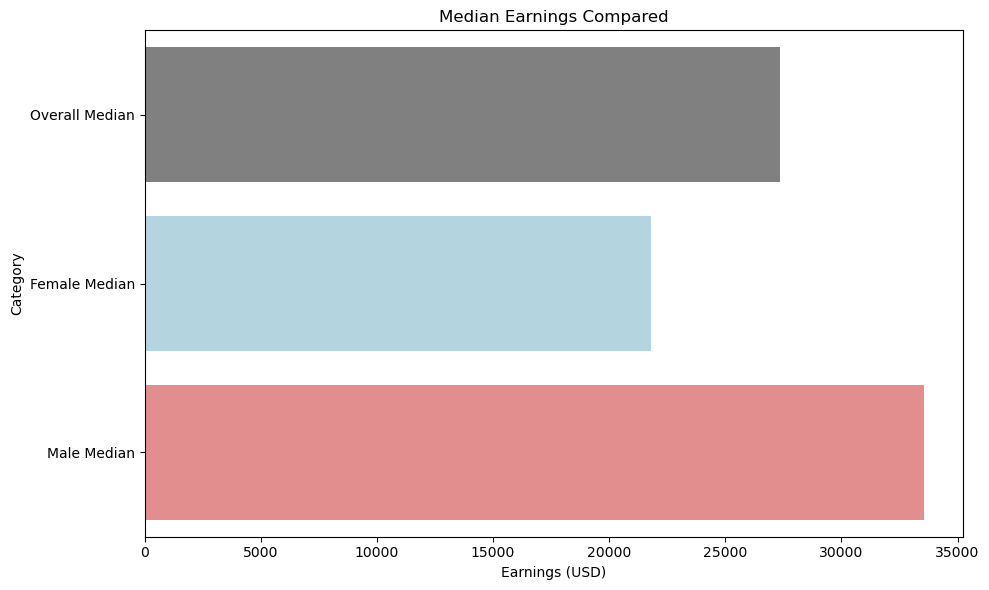

In [39]:
# Create a DataFrame with overall earnings
overall_earnings = {
    'Category': ['Overall Median', 'Female Median', 'Male Median'],
    'Earnings': [df_cleaned['ME'].mean(), df_cleaned['FME'].mean(), df_cleaned['MME'].mean()]
}

# Convert to DataFrame
df_overall_earnings = pd.DataFrame(overall_earnings)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))

# Use seaborn for the horizontal bar plot
sns.barplot(x='Earnings', y='Category', data=df_overall_earnings, palette=['gray', 'lightblue', 'lightcoral'])

# Add title and labels
plt.title('Median Earnings Compared')
plt.xlabel('Earnings (USD)')
plt.ylabel('Category')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

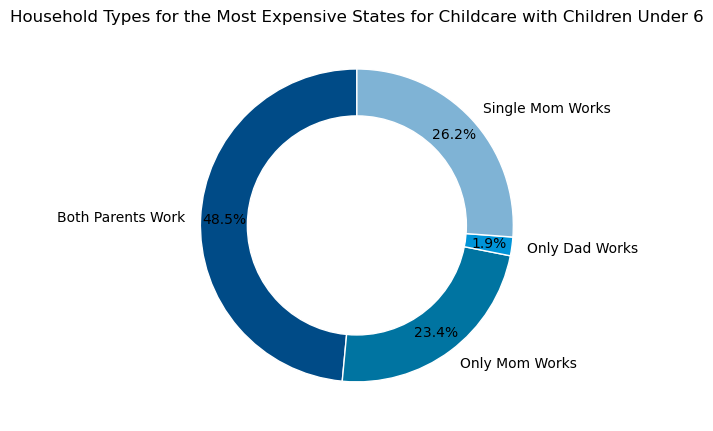

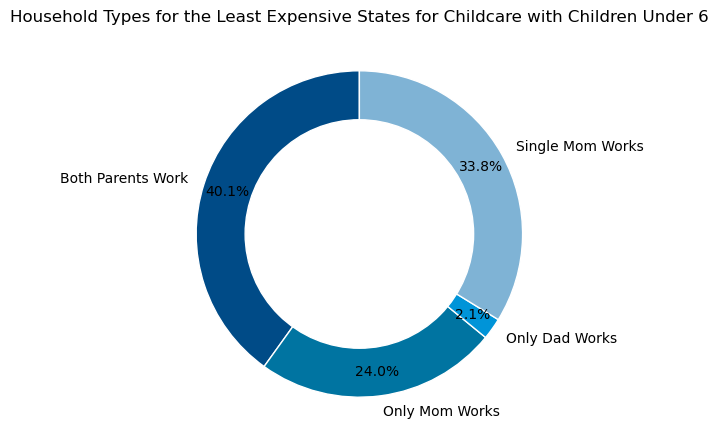

In [34]:
# Filter for the top 3 states with the highest MCToddler prices
top_states = ['Massachusetts', 'Rhode Island', 'Connecticut']
bottom_states = ['Mississippi', 'Kansas', 'West Virginia']

# Get the data for the top 3 states
top_data = df_cleaned[df_cleaned['State_Name'].isin(top_states)][['State_Name', 'H_Under6_BothWork', 'H_Under6_FWork', 'H_Under6_MWork', 'H_Under6_SingleM']]
top_data.set_index('State_Name', inplace=True)

# Get the data for the bottom 3 states
bottom_data = df_cleaned[df_cleaned['State_Name'].isin(bottom_states)][['State_Name', 'H_Under6_BothWork', 'H_Under6_FWork', 'H_Under6_MWork', 'H_Under6_SingleM']]
bottom_data.set_index('State_Name', inplace=True)

# Define labels for household types
labels_map = {
    'H_Under6_BothWork': 'Both Parents Work',
    'H_Under6_SingleM': 'Single Mom Works',
    'H_Under6_MWork': 'Only Dad Works',
    'H_Under6_FWork': 'Only Mom Works'
}

# Define shades of blue color palette
blue_palette = ['#004B87', '#0074A1', '#0094D8', '#7FB3D5'] 

# Create donut chart for top states
plt.figure(figsize=(6, 6))
top_sizes = top_data.sum()
top_labels = [labels_map[label] for label in top_sizes.index]
plt.pie(top_sizes, labels=top_labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'}, colors=blue_palette, pctdistance=0.85)
# Create a white circle in the center for the donut effect
center_circle = plt.Circle((0, 0), 0.70, color='white')
plt.gca().add_artist(center_circle)
plt.title('Household Types for the Most Expensive States for Childcare with Children Under 6')
plt.tight_layout()
plt.show()

# Create donut chart for bottom states
plt.figure(figsize=(6, 6))
bottom_sizes = bottom_data.sum()
bottom_labels = [labels_map[label] for label in bottom_sizes.index]
plt.pie(bottom_sizes, labels=bottom_labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'}, colors=blue_palette, pctdistance=0.85)
# Create a white circle in the center for the donut effect
center_circle = plt.Circle((0, 0), 0.70, color='white')
plt.gca().add_artist(center_circle)
plt.title('Household Types for the Least Expensive States for Childcare with Children Under 6')
plt.tight_layout()
plt.show()

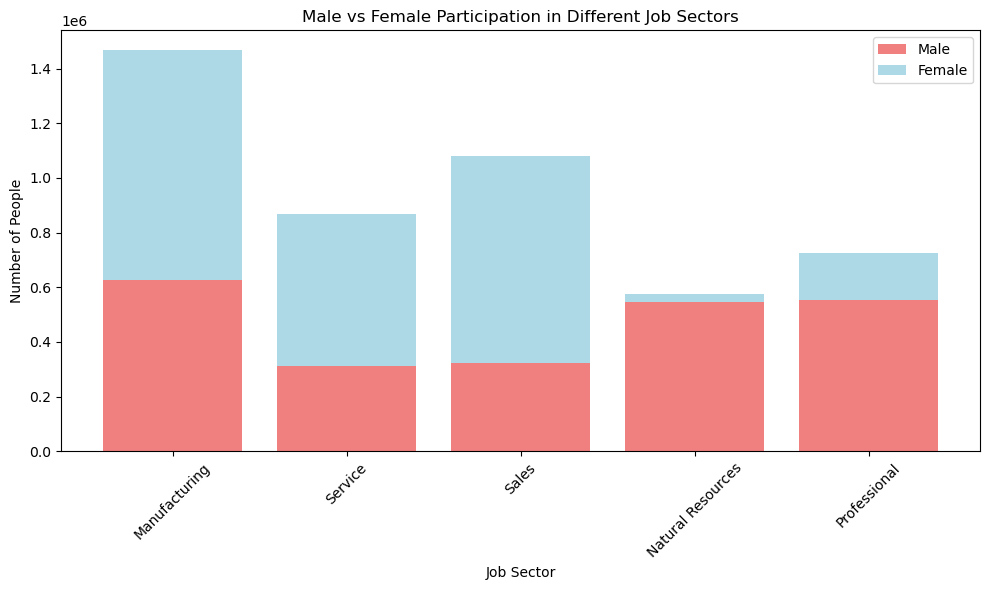

In [17]:
# Creating a stacked bar chart for different job sectors and male vs female participation
sectors = ['MEMP_M', 'FEMP_M', 'MEMP_Service', 'FEMP_Service', 'MEMP_Sales', 'FEMP_Sales', 'MEMP_N', 'FEMP_N', 'MEMP_P', 'FEMP_P']

# Summing up participation by gender across all states
df_sectors = df_cleaned[sectors].sum()

# Prepare data for stacked bar plot by creating a DataFrame for each sector's male and female values
df_male = df_sectors[['MEMP_M', 'MEMP_Service', 'MEMP_Sales', 'MEMP_N', 'MEMP_P']]
df_female = df_sectors[['FEMP_M', 'FEMP_Service', 'FEMP_Sales', 'FEMP_N', 'FEMP_P']]

# Combine male and female participation into a new DataFrame
df_combined = pd.DataFrame({
    'Male': df_male.values,
    'Female': df_female.values
}, index=['Manufacturing', 'Service', 'Sales', 'Natural Resources', 'Professional'])

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot male participation bars
ax.bar(df_combined.index, df_combined['Male'], label='Male', color='lightcoral')

# Plot female participation bars stacked on top of male participation
ax.bar(df_combined.index, df_combined['Female'], bottom=df_combined['Male'], label='Female', color='lightblue')

# Adding labels and title
ax.set_title('Male vs Female Participation in Different Job Sectors')
ax.set_ylabel('Number of People')
ax.set_xlabel('Job Sector')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend and show the plot
plt.legend()
plt.tight_layout()
plt.show()

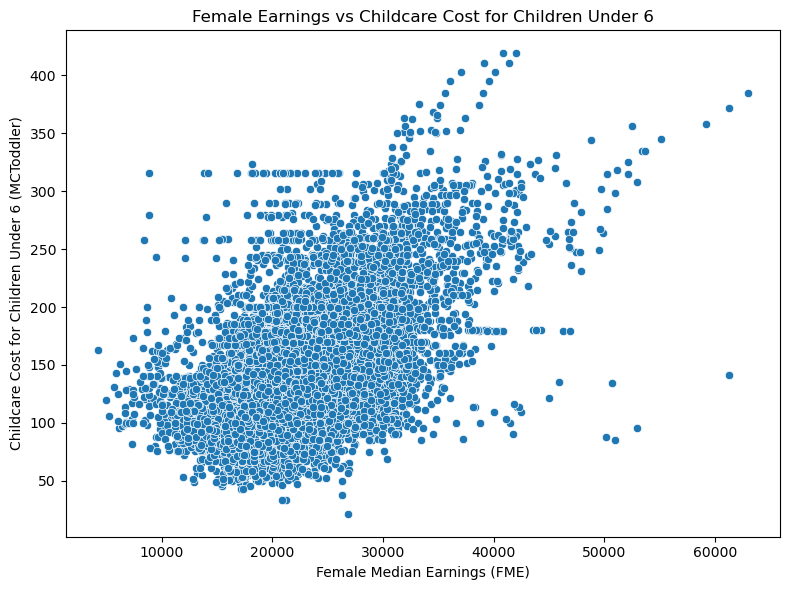

In [15]:
# Scatterplot of Female Earnings (FME) vs Childcare Cost for Children Under 6 (MCToddler)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='FME', y='MCToddler', data=df_cleaned)
plt.title('Female Earnings vs Childcare Cost for Children Under 6')
plt.xlabel('Female Median Earnings (FME)')
plt.ylabel('Childcare Cost for Children Under 6 (MCToddler)')
plt.tight_layout()
plt.show()